## Name: Shreyash Shinkar
## Roll no: 31373
## DSBDAL Assignment 5 - Data Analytics II

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


### We have 4 feature variables - User ID, Gender, Age and Estimated Salary, and 1 target variable - Purchased. The shape of our dataset is 400 rows x 5 columns.

In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### There are no null values in the dataset. 

In [6]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### Our task is to use Logistic Regression to predict if the users on the social network who interacted with the advertisement purchased the product or not

### Initially, we will check the correlation between the feature variables and target variable. This will help us decide the variables we need to consider while performing Regression.

Text(0.5, 1.0, 'User ID vs Purchased')

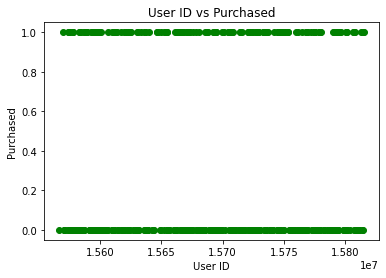

In [7]:
x1 = df["User ID"]
y1 = df["Purchased"]
plt.scatter(x1,y1, color='Green')
plt.xlabel('User ID')
plt.ylabel('Purchased')
plt.title('User ID vs Purchased')

### There does not appear to be any correlation between UserID and Purchased.

Text(0.5, 1.0, 'Gender vs Purchased')

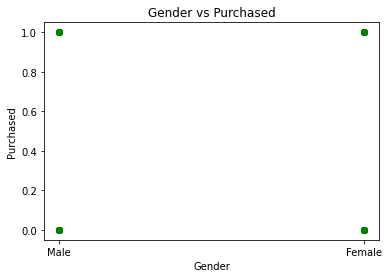

In [8]:
x1 = df["Gender"]
y1 = df["Purchased"]
plt.scatter(x1,y1, color='Green')
plt.xlabel('Gender')
plt.ylabel('Purchased')
plt.title('Gender vs Purchased')

### There does not appear to be any correlation between Gender and Purchased.

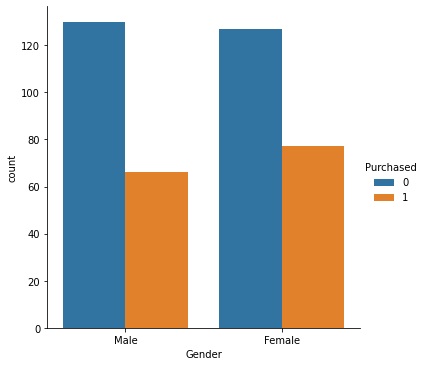

In [9]:
sns.catplot(x ="Gender", hue ="Purchased", kind ="count", data = df)

### The number of Females that have purchased the product is slightly higher as compare to the number of Males who have purchased the product.

In [10]:
print(df["Purchased"].value_counts())
print(df[df["Gender"]=="Male"][df["Purchased"]==1].count())
print(df[df["Gender"]=="Female"][df["Purchased"]==1].count())

0    257
1    143
Name: Purchased, dtype: int64
User ID            66
Gender             66
Age                66
EstimatedSalary    66
Purchased          66
dtype: int64
User ID            77
Gender             77
Age                77
EstimatedSalary    77
Purchased          77
dtype: int64


<ipython-input-10-6deabc2e6eba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Gender"]=="Male"][df["Purchased"]==1].count())
<ipython-input-10-6deabc2e6eba>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df["Gender"]=="Female"][df["Purchased"]==1].count())


### 66 Males have purchased the product and 77 Females have purchased the product. This is in accordance with the value count of the total people that have purcahsed the product, which is 143.

Text(0.5, 1.0, 'Age vs Purchased')

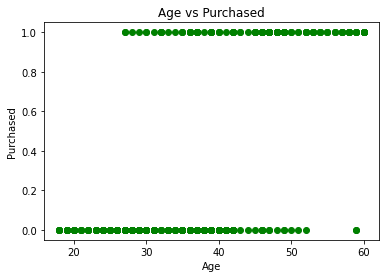

In [11]:
x1 = df["Age"]
y1 = df["Purchased"]
plt.scatter(x1,y1, color='Green')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')

### From the above scatter plot we observe that people above the age of ~25 buy the product. The elderly people are more likely to buy the product as compared to the younger people.

Text(0.5, 1.0, 'EstimatedSalary vs Purchased')

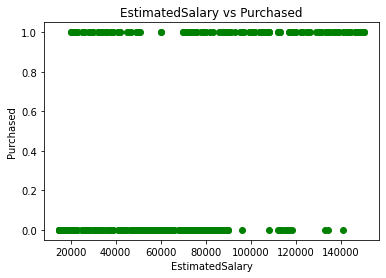

In [12]:
x1 = df["EstimatedSalary"]
y1 = df["Purchased"]
plt.scatter(x1,y1, color='Green')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.title('EstimatedSalary vs Purchased')

### Although the people having a Estimated Salary more than 100,000 are few, they have purchased the product significantly. It is not very clear if there is any clear relation between the EstimatedSalary and Purchased variables. 

### Now we will plot a heatmap to check the correlation coefficients between the variables.

<AxesSubplot:>

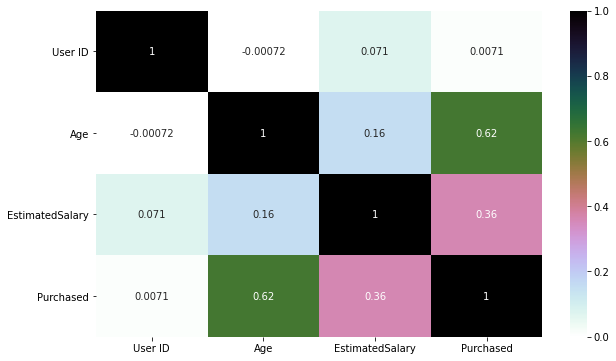

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 

### From the correlation coefficients, it is evident that the variables "Age" and "EstimatedSalary" are much more  correlated to our target variable "Purchased", as compared to the other variables.

### Abiding with the above observations, we shall use the variables "Age" and "EstimatedSalary" to perform Logistic Regression.

In [14]:
X = df[["Age","EstimatedSalary"]]
Y = df["Purchased"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

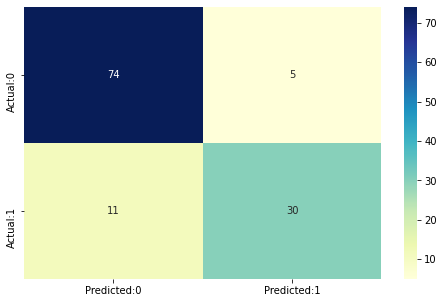

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu");

In [20]:
TP = 30 # TruePositives
TN = 74 # TrueNegatives
FP = 5  # FalsePositives
FN = 11 # FalseNegatives

In [21]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("Accuracy = ", Accuracy)
print("Precision = ", Precision)
print("Recall(Sensitivity) = ", Recall)

Accuracy =  0.8666666666666667
Precision =  0.8571428571428571
Recall(Sensitivity) =  0.7317073170731707
